# 0. required packages

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

12460


# 1. load existing datasets

In [14]:
cell_positive = [r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200807-proB_iaa_dox+\Picked_spots_fov_3-12.pkl']
cell_negative = [r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200827_proB_DMSO\Picked_spots_fov_3-12.pkl',
                 r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200920_IgH_proB_DMSO_2color\Picked_spots_fov_3-12.pkl', 
                 r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20201215-proB_DMSO\Picked_spots_fov_3-12.pkl',
                ]
bone_marrow_wt = [r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20201012_bone_marrow_igh++\Picked_spots_fov_3-12.pkl']

In [15]:
cell_positive_data = [pickle.load(open(_fl, 'rb')) for _fl in cell_positive]
cell_negative_data = [pickle.load(open(_fl, 'rb')) for _fl in cell_negative]

<IPython.core.display.Javascript object>


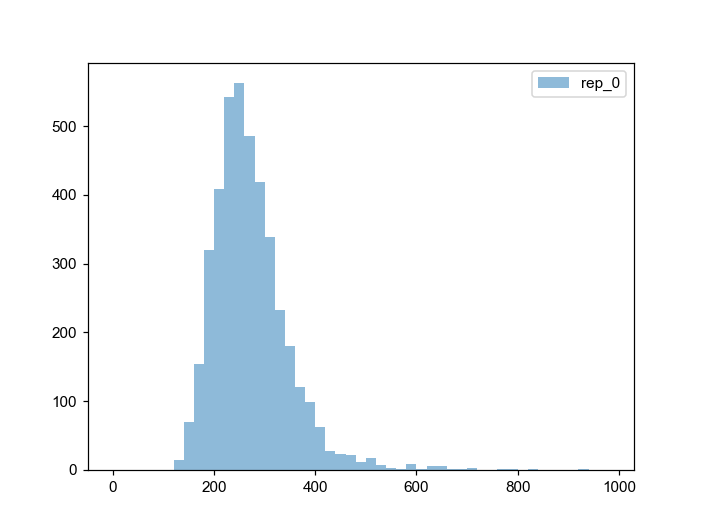

260.3842558743332


In [25]:
plt.figure()
for _i, _data in enumerate(cell_positive_data):
    rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:72,1:]) for _hzxys in _data['hzxys']]
    plt.hist(rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'rep_{_i}')
    print(np.median(rgs))
plt.legend()
plt.show()
    

<IPython.core.display.Javascript object>


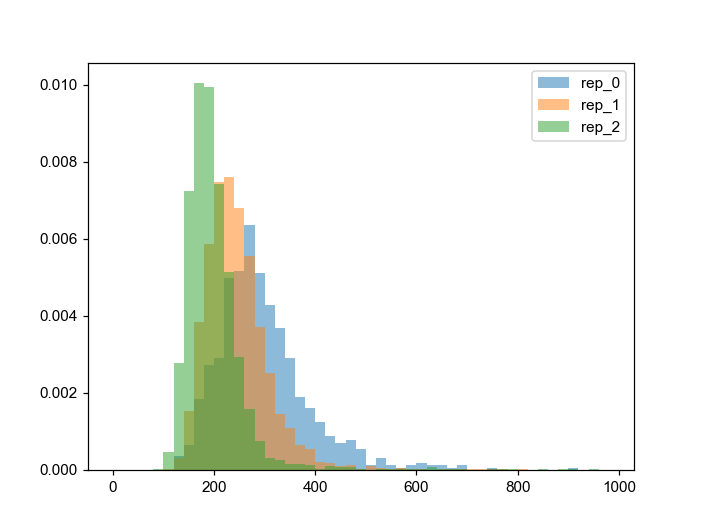

280.46866397030254
235.62455007778644
188.52193932306085


In [26]:
plt.figure()
for _i, _data in enumerate(cell_negative_data):
    rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:72,1:]) for _hzxys in _data['hzxys']]
    plt.hist(rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'rep_{_i}', density=True)
    print(np.median(rgs))
plt.legend()
plt.show()
    

In [8]:
len(cell_negative_data[0]['hzxys'])

843